In [1]:
from DOE import Import, Calc, Plot
import pandas as pd

df, df_melt, names, mean = Import.import_df("katoen.xlsx", "Blad2", 5)
df_melt

,index,treatment,value,means
0,1,15,7,9.8
1,2,15,7,9.8
2,3,15,15,9.8
3,4,15,11,9.8
4,5,15,9,9.8
5,1,20,12,15.4
6,2,20,17,15.4
7,3,20,12,15.4
8,4,20,18,15.4
9,5,20,18,15.4


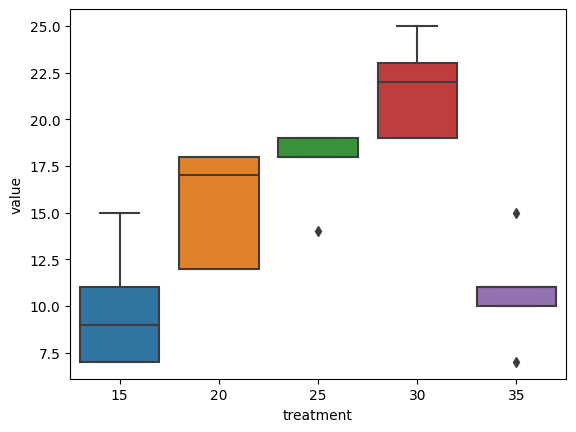

In [2]:
Plot.boxplot(df_melt)

In [3]:
df_melt, model, anova_table = Calc.anova(df_melt, 0.05)

H0 rejected


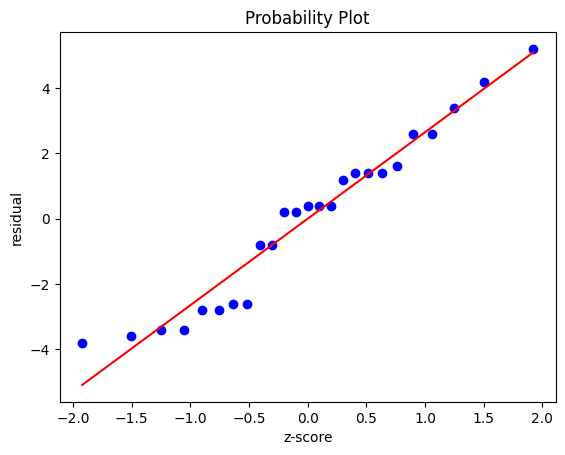

In [4]:
Plot.norm_plot(df_melt)

In [5]:
lsd = Calc.LSD(anova_table, mean, 0.05, 5, 5)

1-2: SIGNIFICANT DIFFERENCE!
1-3: SIGNIFICANT DIFFERENCE!
1-4: SIGNIFICANT DIFFERENCE!
1-5: no significant difference 
2-3: no significant difference 
2-4: SIGNIFICANT DIFFERENCE!
2-5: SIGNIFICANT DIFFERENCE!
3-4: SIGNIFICANT DIFFERENCE!
3-5: SIGNIFICANT DIFFERENCE!
4-5: SIGNIFICANT DIFFERENCE!


In [6]:
lsd

3.745451782460061

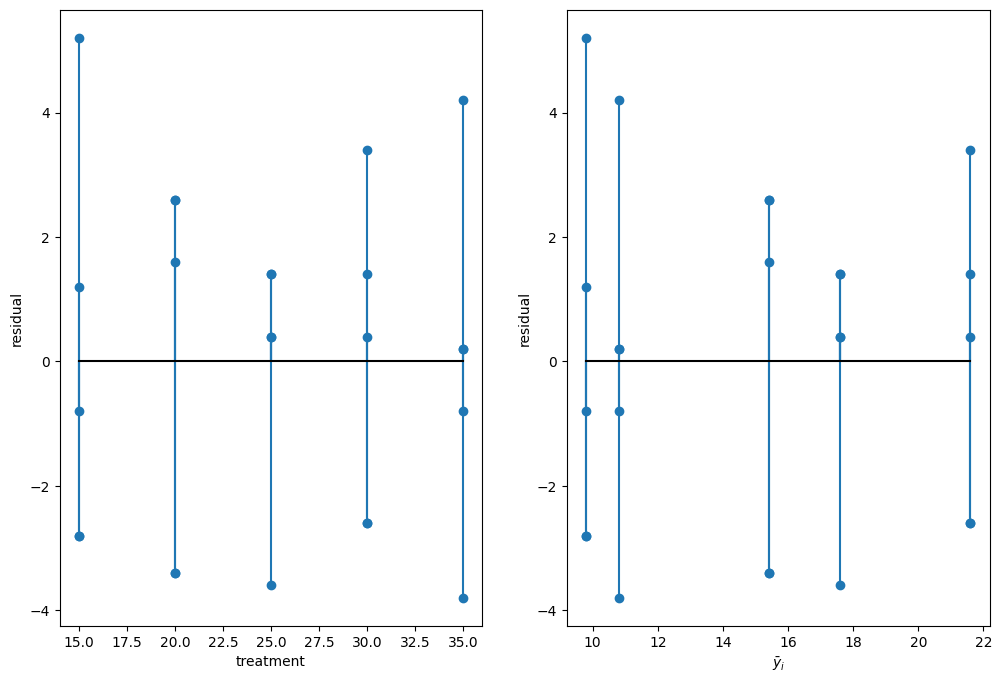

In [7]:
Plot.res_plot(df_melt)

In [8]:
df_melt

,index,treatment,value,means,residual
0,1,15,7,9.8,-2.8
1,2,15,7,9.8,-2.8
2,3,15,15,9.8,5.2
3,4,15,11,9.8,1.2
4,5,15,9,9.8,-0.8
5,1,20,12,15.4,-3.4
6,2,20,17,15.4,1.6
7,3,20,12,15.4,-3.4
8,4,20,18,15.4,2.6
9,5,20,18,15.4,2.6
